# Pymaceuticals Inc.
---

### Analysis

- The effective drug regimens in this study are Capomulin and Ramicane because their average tumor size went down. All of the other regimens average size increased in volume.  
- All regimen studys were consistantw with gender, population size, and starting tumor weight.
- Need more information on what the timepoints stand for to see if a longer study is needed.  If time seems long enough that results are clear, Capomulin and Ramicane should move on to next stage in regiment developemnt.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
mouse_count

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_row_series = mouse_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
bad_mice = mouse_data[dup_row_series]["Mouse ID"].unique()
bad_mice

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_row_series = mouse_data["Mouse ID"].isin(bad_mice)
bad_mice_row_series

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data[~bad_mice_row_series]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_volume = clean_df["Tumor Volume (mm3)"].mean()
median_volume = clean_df["Tumor Volume (mm3)"].median()
variance_volume = clean_df["Tumor Volume (mm3)"].var()
std_deviation = clean_df["Tumor Volume (mm3)"].std()
sem = clean_df["Tumor Volume (mm3)"].sem()

mean_volume_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_volume_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_volume_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_deviation_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_gb = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_summary_table = pd.DataFrame({
    "Mean Tumor Volume": mean_volume_gb,
    "Median Tumor Volume": median_volume_gb,
    "Tumor Volume Variance": variance_volume_gb,
    "Tumor Volume Std. Dev.": std_deviation_gb,
    "Tumor Volume Std. Err.": sem_gb

})

drug_summary_table.index.name = None

# Display the DataFrame
drug_summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_funcs = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],
    #"Weight (g)": ["mean", "min", "max"],
}
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen").agg(agg_funcs)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

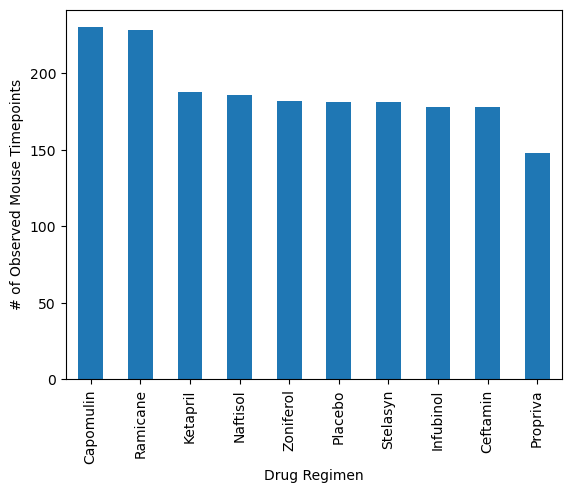

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Use the value cout to get the Drug Regimen name and count of timepoints
drug_count = clean_df["Drug Regimen"].value_counts()

# Create the bar chart with pandas. 
drug_count.plot(kind="bar")

#Label the bar chart
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

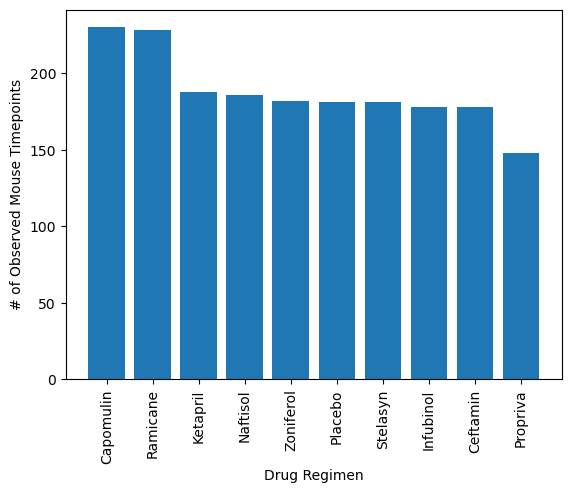

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# use the drug_count variable to get the index for names and the value for a count of the timepoints.
plt.bar(drug_count.index,drug_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

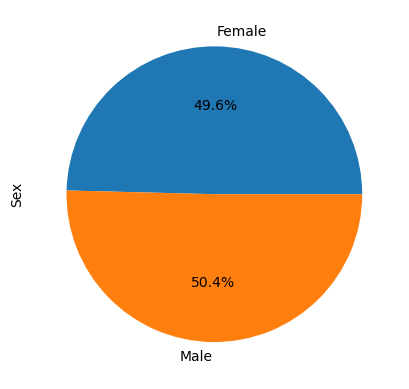

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the of female and male mice in the new dataframe.
mouse_sex = clean_df.groupby("Sex")["Mouse ID"].nunique()

# Create a pie chart using pandas
mouse_sex.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

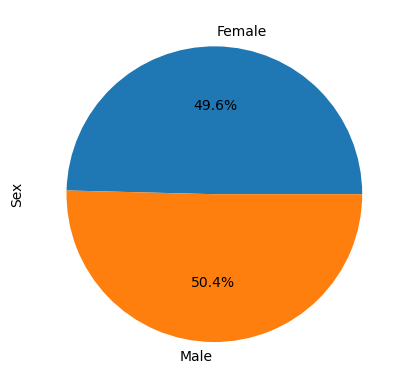

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculated the differences in males vs female mice and entered the values
labels = ["Female", "Male"]
sizes = [49.5968,50.4032]

# create a pie chart using pyplot
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_mouse_timpoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(greatest_mouse_timpoint,clean_df, how="left", left_on=["Mouse ID","Timepoint"], right_on=["Mouse ID","Timepoint"])
final_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data as series (for plotting)
tumor_vol = []

# for each promising drug.
for drug in drug_list:
    #print(drug)
    
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_filter_series = final_timepoint_df["Drug Regimen"] == drug
    drug_tumor_volume = final_timepoint_df.loc[drug_filter_series, "Tumor Volume (mm3)"]
    
    # add tumor volume series to list for plotting
    tumor_vol.append(drug_tumor_volume)
    
    # Determine outliers within this drug using IQR, upper, and lower bounds
    quartiles = drug_tumor_volume.quantile([0.25,0.75]) 
    
    # Determine outliers using upper and lower bounds
    upperq = quartiles[0.75]
    lowerq = quartiles[0.25]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # print(f"------------------------------------------------------------")
    # print(f"The upper quartile of {drug} is: {upperq}")
    # print(f"The lower quartile of {drug} is: {lowerq}")
    # print(f"The interquartile range of {drug} is: {iqr}")
    # print(f"Values below {lower_bound} could be {drug} outliers.")
    # print(f"Values above {upper_bound} could be {drug} outliers.")
    # print(f"------------------------------------------------------------")

    lower_outlier_filter_series = drug_tumor_volume < lower_bound  
    upper_outlier_filter_series = drug_tumor_volume > upper_bound

    outliers = drug_tumor_volume[lower_outlier_filter_series | upper_outlier_filter_series]
    print(drug, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


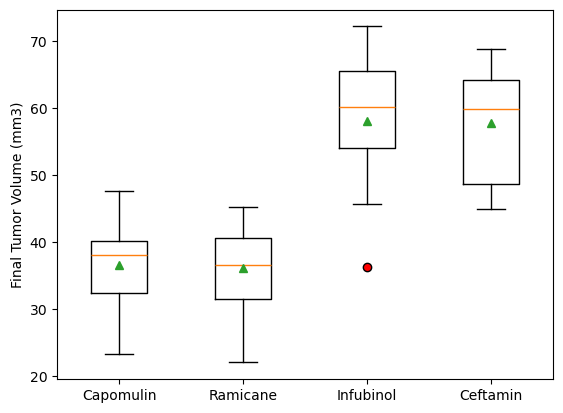

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, showmeans=True, labels=drug_list, flierprops=dict(markerfacecolor='red') )
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find mouse l509 and sepate for x and y. 
mouse_l509 = clean_df[(clean_df["Mouse ID"] == "l509")]
l509_tp = mouse_l509["Timepoint"]
l509_vol = mouse_l509["Tumor Volume (mm3)"]
l509_tp_vol = plt.plot(l509_tp,l509_vol)

# Create line chart and label
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Get average tumor volume for all mice on capomulin
ave_tumor_vol = clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# merge with mouse data
cap_drug_data = pd.merge(ave_tumor_vol, mouse_metadata, on="Mouse ID")

# create scatter chart
plt.scatter(cap_drug_data["Weight (g)"], cap_drug_data["Tumor Volume (mm3)"], marker="*")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# find correlation coefficient
correlation_co = st.pearsonr(cap_drug_data["Weight (g)"], cap_drug_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_co[0],2)}")

# find linear regression
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(cap_drug_data["Weight (g)"],cap_drug_data["Tumor Volume (mm3)"])
regress_values = cap_drug_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# create scatter chart, label, and add values
plt.scatter(cap_drug_data["Weight (g)"], cap_drug_data["Tumor Volume (mm3)"], marker="*")
plt.plot(cap_drug_data["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen: Weight vs Average Tumor Volume")
plt.show()
